---
<h1 style="text-align: center;">Geração de Número Aleatório</h1>
<h2 style="text-align: center;"></h2>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 30/07/2024

---
---

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Obtendo os dados na COGN3 pelo Yahoo Finance
data = yf.download("^BVSP", start="1993-04-27", end="2024-07-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [11]:
# Criando uma variável que contêm os retornos
ret = data.pct_change()

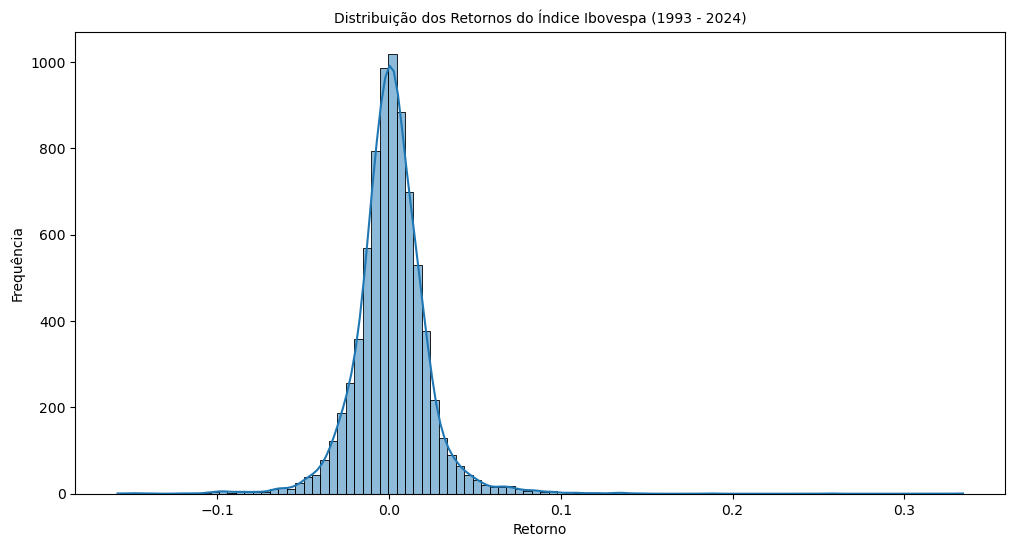

In [18]:
# Plotando o histograma dos retornos
plt.figure(figsize=(12,6))
sns.histplot(ret, kde=True, bins=100)
plt.title("Distribuição dos Retornos do Índice Ibovespa (1993 - 2024)", fontsize=10)
plt.xlabel("Retorno")
plt.ylabel("Frequência")
plt.show()

In [65]:
n = len(ret)
media_ret = ret.mean()
dp_ret = ret.std()
print("μ_{x} = ", media_ret, "\n", "σ_{x} = ", dp_ret)

μ_{x} =  0.001338043671390238 
 σ_{x} =  0.021645510398193464


# Gerando valores aleatorios
X = [dp_ret * np.sqrt(12 / 1) * (np.random.uniform(0, 1) - 1 / 2) + media_ret for _ in range(n)]
X = np.array(X)

In [122]:
# Gerando valores aleatorios
X = []
for i in range(n):
  U = np.random.uniform(0, 1)
  X.append(dp_ret * np.sqrt(12 / 1) * (U - 1 / 2) + media_ret)

X = np.array(X)

In [123]:
print("μ_{x} = ", X.mean(), "\n", "σ_{x} = ", X.std())

μ_{x} =  0.001522619710163932 
 σ_{x} =  0.021576665068187947


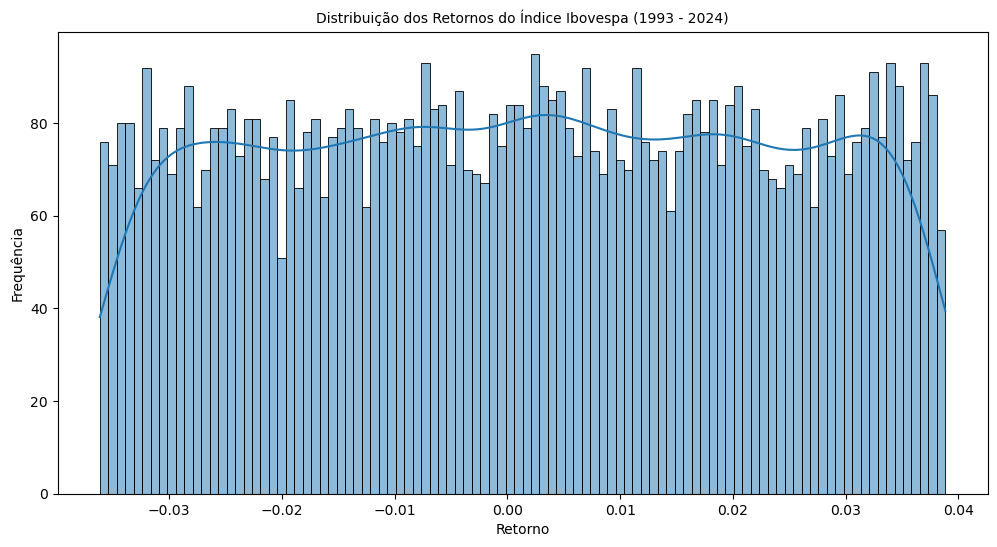

In [124]:
plt.figure(figsize=(12,6))
sns.histplot(X, kde=True, bins=100)
plt.title("Distribuição dos Retornos do Índice Ibovespa (1993 - 2024)", fontsize=10)
plt.xlabel("Retorno")
plt.ylabel("Frequência")
plt.show()